In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


primary furl is the target variable in the above data 

In [3]:
df.shape

(907, 27)

In [4]:
df.isna().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [5]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [7]:
df.nunique().to_frame

<bound method Series.to_frame of country                       1
country_long                  1
name                        907
gppd_idnr                   907
capacity_mw                 361
latitude                    836
longitude                   827
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013           0
generation_gwh_2014         371
generation_gwh_2015         396
generation_gwh_2016         403
generation_gwh_2017         408
generation_gwh_2018         410
generation_gwh_2019           0
generation_data_source        1
estimated_generation_gwh      0
dtype: int64>

In [8]:
df['other_fuel2'].unique()

array([nan, 'Oil'], dtype=object)

In [9]:
df['other_fuel3'].unique()

array([nan])

In [10]:
df['other_fuel1'].unique()

array([nan, 'Oil', 'Cogeneration', 'Gas'], dtype=object)

In [11]:
df['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', nan,
       'Industry About'], dtype=object)

In [12]:
df['year_of_capacity_data'].unique()

array([  nan, 2019.])

In [13]:
df['generation_gwh_2013'].unique()

array([nan])

In [14]:
df['generation_gwh_2019'].unique()

array([nan])

In [15]:
df['generation_data_source'].unique()

array([nan, 'Central Electricity Authority'], dtype=object)

In [16]:
df.drop(['country','country_long','name','gppd_idnr','other_fuel2','other_fuel3','owner','url','wepp_id','year_of_capacity_data','generation_gwh_2013','generation_gwh_2019','generation_data_source','estimated_generation_gwh'],axis=1,inplace=True)

We are droping these columns in this data because most of them contain more than 50% data which is of missing values.

In [17]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,NaN,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,NaN,2004.0,Central Electricity Authority,WRI,617.789264,843.747,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,Oil,2015.0,Central Electricity Authority,WRI,3035.550000,5916.370,6243.000000,5385.579736,7279.000000


In [18]:
df.shape

(907, 13)

In [19]:
object = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        object.append(x)
print(f"Object Data Type Columns are: ", object)


# getting the list of float data type column names
float = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'float64':
        float.append(x)
print(f"Float Data Type Columns are: ", float)

Object Data Type Columns are:  ['primary_fuel', 'other_fuel1', 'source', 'geolocation_source']
Float Data Type Columns are:  ['capacity_mw', 'latitude', 'longitude', 'commissioning_year', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']


I have separated the numerical and categorical data 

In [20]:
df["latitude"].fillna(df["latitude"].mean(),inplace=True)
df["longitude"].fillna(df["longitude"].mean(),inplace=True)
df["commissioning_year"].fillna(df["commissioning_year"].mode()[0],inplace=True)
df["geolocation_source"].fillna(df["geolocation_source"].mode()[0],inplace=True)

using mean for continous data and mode for categorical data by filling missing values

In [21]:
df.isnull().sum()

capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
other_fuel1            709
commissioning_year       0
source                   0
geolocation_source       0
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

In [22]:
from sklearn.impute import KNNImputer
knn=KNNImputer(n_neighbors=3)
knn=pd.DataFrame(knn.fit_transform(df[["capacity_mw","generation_gwh_2014"]]))
knn.columns=["capacity_mw","generation_gwh_2014"]
df["generation_gwh_2014"]=knn["generation_gwh_2014"]
df['generation_gwh_2014']

0        16.779017
1       324.532517
2        85.185267
3       617.789264
4      3035.550000
          ...     
902    3691.517167
903      16.779017
904      16.779017
905     213.394333
906      16.779017
Name: generation_gwh_2014, Length: 907, dtype: float64

In [23]:
knn=KNNImputer(n_neighbors=3)
knn=pd.DataFrame(knn.fit_transform(df[["capacity_mw","generation_gwh_2015"]]))
knn.columns=["capacity_mw","generation_gwh_2015"]
df["generation_gwh_2015"]=knn["generation_gwh_2015"]
df['generation_gwh_2015']


0        13.293200
1       168.964267
2       112.481433
3       843.747000
4      5916.370000
          ...     
902       0.994875
903      13.293200
904      13.293200
905     187.315383
906      13.293200
Name: generation_gwh_2015, Length: 907, dtype: float64

In [24]:
knn=KNNImputer(n_neighbors=3)
knn=pd.DataFrame(knn.fit_transform(df[["capacity_mw","generation_gwh_2016"]]))
knn.columns=["capacity_mw","generation_gwh_2016"]
df["generation_gwh_2016"]=knn["generation_gwh_2016"]
df['generation_gwh_2016']


0         8.974900
1       253.214233
2       114.819683
3       886.004428
4      6243.000000
          ...     
902     233.596650
903       8.974900
904       8.974900
905     216.123950
906       8.974900
Name: generation_gwh_2016, Length: 907, dtype: float64

In [25]:

knn=KNNImputer(n_neighbors=3)
knn=pd.DataFrame(knn.fit_transform(df[["capacity_mw","generation_gwh_2017"]]))
knn.columns=["capacity_mw","generation_gwh_2017"]
df["generation_gwh_2017"]=knn["generation_gwh_2017"]
df['generation_gwh_2017']

0        22.244883
1       210.319783
2       185.902483
3       663.774500
4      5385.579736
          ...     
902     865.400000
903      22.244883
904      22.244883
905     243.171367
906      22.244883
Name: generation_gwh_2017, Length: 907, dtype: float64

In [26]:
knn=KNNImputer(n_neighbors=3)
knn=pd.DataFrame(knn.fit_transform(df[["capacity_mw","generation_gwh_2018"]]))
knn.columns=["capacity_mw","generation_gwh_2018"]
df["generation_gwh_2018"]=knn["generation_gwh_2018"]
df['generation_gwh_2018']

0        47.968950
1       299.083733
2       198.180783
3       626.239128
4      7279.000000
          ...     
902     686.500000
903      47.968950
904      47.968950
905     256.620450
906      47.968950
Name: generation_gwh_2018, Length: 907, dtype: float64

In [27]:
df["other_fuel1"] = df["other_fuel1"].fillna(df["other_fuel1"].mode()[0])

In [28]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.464907,2004.594267,1216.741950,1225.073916,1247.908108,1294.299953,1348.291762
std,590.085456,6.079148,4.812291,15.734928,2944.274717,3119.361453,3138.569942,3187.953881,3293.148855
min,0.000000,8.168900,68.644700,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,74.388900,1998.000000,16.779017,13.293200,8.974900,22.244883,47.968950
50%,59.200000,21.281800,76.979200,2014.000000,171.853083,139.546801,131.021600,128.822650,133.912800
75%,385.250000,25.176450,79.206100,2015.000000,926.055500,735.113025,780.149650,817.977250,810.733240
max,4760.000000,34.649000,95.408000,2018.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


1.The counts of columns are same which means there are no missing values present in the dataset.

2.The mean is more than the median(50%) in all the columns except latitude which means they are skewed to right.Most data is right skewed.

3.The median is little greater than the mean in commissioning_year which means it is left skewed.

4.From the difference between maximum and 75% percentile we can infer that there are huge outliers present.

Univariate Analysis

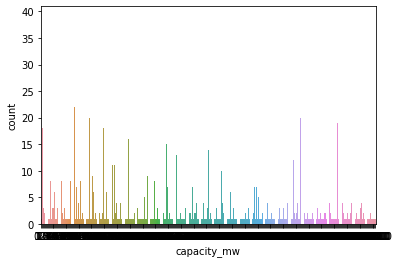

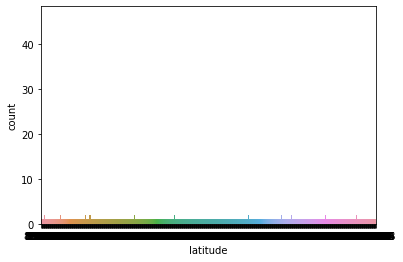

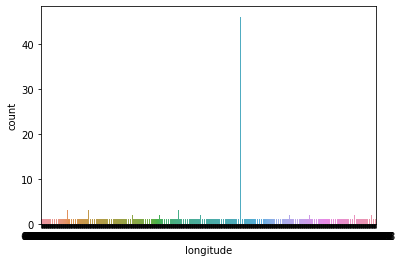

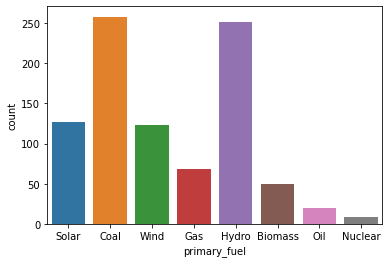

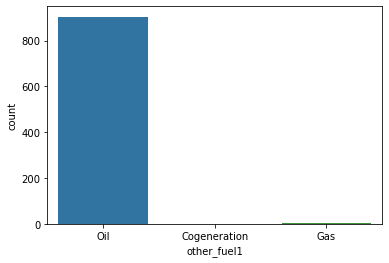

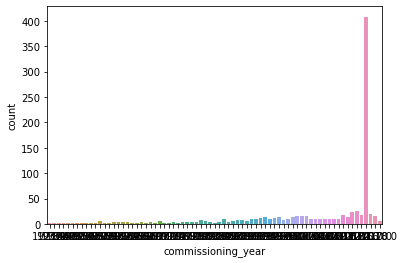

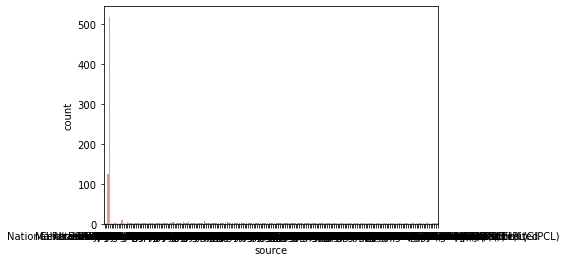

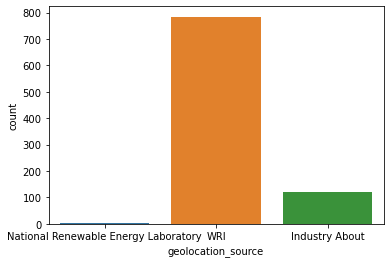

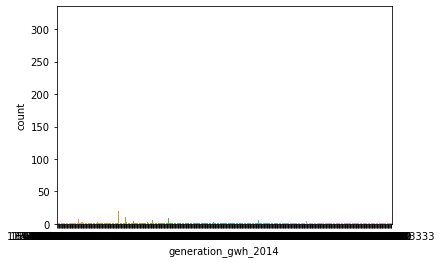

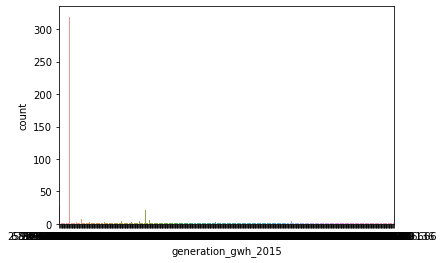

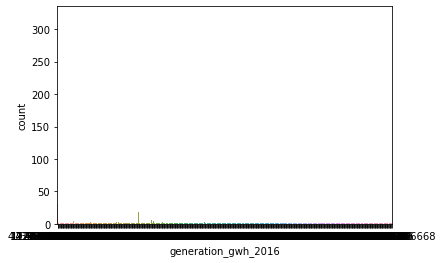

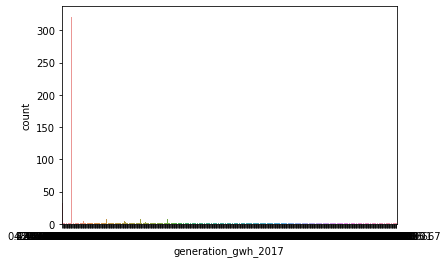

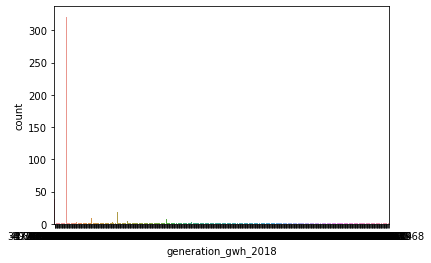

In [29]:
for i,col in enumerate(df.columns):
    plt.figure(i)
    sns.countplot(x=col ,data=df)

Coal and Hydro were widely used and least used was oil and nuclear in primary fuel 
In other fuel most used was oil
The geolaction source was max in WRI and minimum from National Renewable Energy Lab


Bivariate Analysis

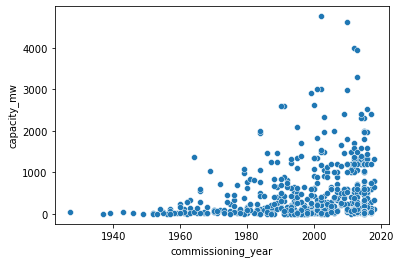

In [30]:
sns.scatterplot(x = "commissioning_year" , y = "capacity_mw", data = df)
plt.show()

As years increased so the consumption also increased in older times it was less

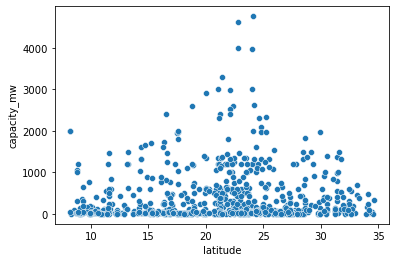

In [31]:
sns.scatterplot(x = "latitude", y = "capacity_mw", data = df)
plt.show()

 latitude geolocation for electricty generation is highest measuring the mega watts between 20 to 25 decimal degrees.

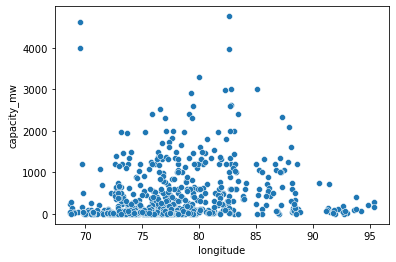

In [32]:
sns.scatterplot(x = "longitude", y = "capacity_mw", data = df)
plt.show()

longitude geolocation for electricty generation is highest measuring the mega watts around 70 and then again between 80-85 decimal degrees.

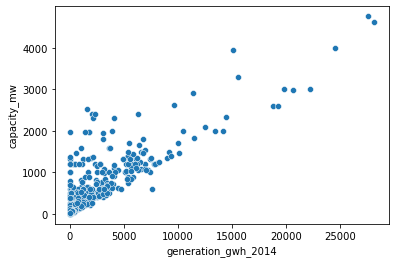

In [33]:
sns.scatterplot(x = "generation_gwh_2014", y = "capacity_mw", data = df)
plt.show()

As generation gwh increases the capacity also increase and there is a linear relationship

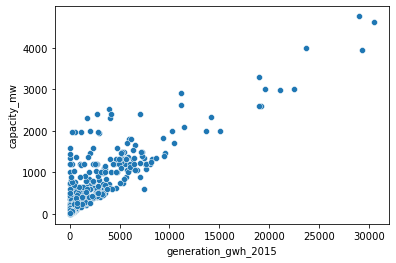

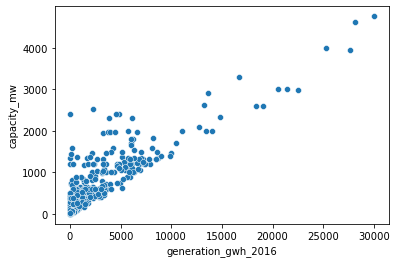

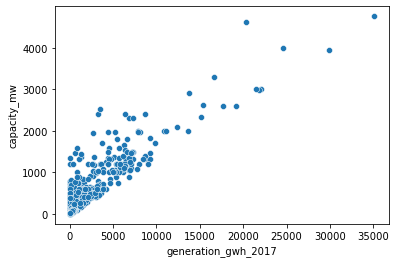

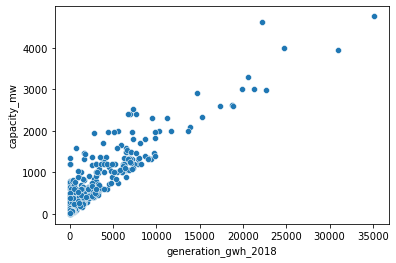

In [34]:
sns.scatterplot(x = "generation_gwh_2015", y = "capacity_mw", data = df)
plt.show()
sns.scatterplot(x = "generation_gwh_2016", y = "capacity_mw", data = df)
plt.show()
sns.scatterplot(x = "generation_gwh_2017", y = "capacity_mw", data = df)
plt.show()
sns.scatterplot(x = "generation_gwh_2018", y = "capacity_mw", data = df)
plt.show()

There is a linear relationship in all the four graph as generation growth increased so did the capacity increased

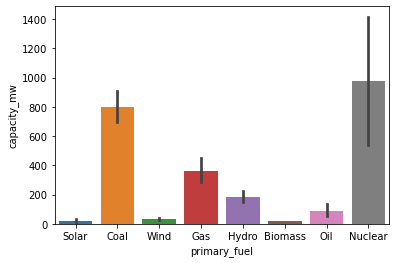

In [35]:
sns.barplot(x = "primary_fuel", y = "capacity_mw", data = df)
plt.show()

Nuclear engery has more capacity then others and coal later

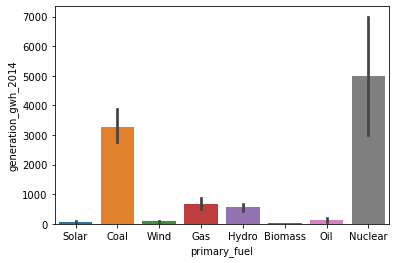

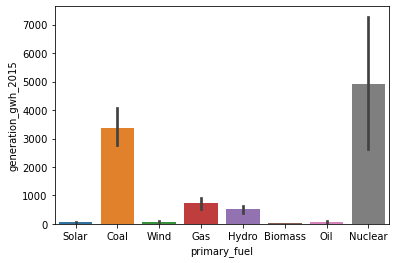

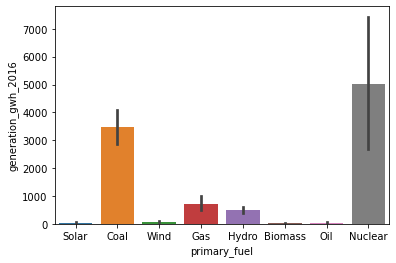

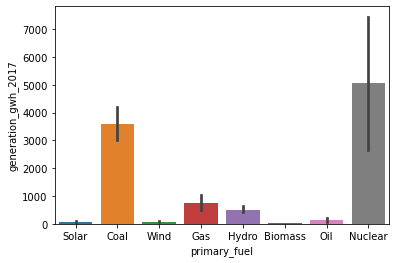

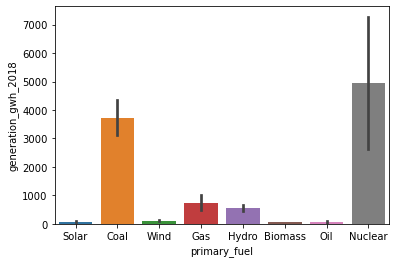

In [36]:
sns.barplot(x = "primary_fuel", y = "generation_gwh_2014", data = df)
plt.show()
sns.barplot(x = "primary_fuel", y = "generation_gwh_2015", data = df)
plt.show()
sns.barplot(x = "primary_fuel", y = "generation_gwh_2016", data = df)
plt.show()
sns.barplot(x = "primary_fuel", y = "generation_gwh_2017", data = df)
plt.show()
sns.barplot(x = "primary_fuel", y = "generation_gwh_2018", data = df)
plt.show()

Nuclear power is the most energy productive all year later coal

In [37]:
corr=df.corr()

<module 'matplotlib.pyplot' from 'C:\\Users\\Jaswinder kaur\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

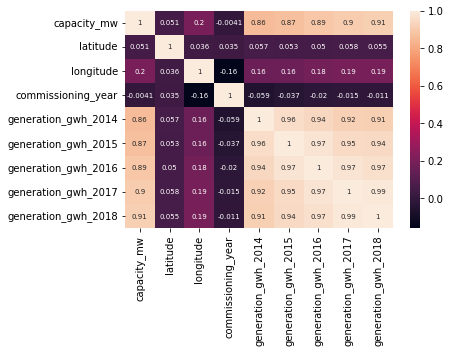

In [38]:
sns.heatmap(df.corr(),annot=True,annot_kws={'size':7})
plt

Now we will change the object data into float data by using Label Encoder

In [39]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["primary_fuel"] = le.fit_transform(df["primary_fuel"])
df.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,Oil,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,16.779017,13.293200,8.974900,22.244883,47.968950
1,98.0,24.7663,74.6090,1,Oil,2015.0,Ultratech Cement ltd,WRI,324.532517,168.964267,253.214233,210.319783,299.083733
2,39.2,21.9038,69.3732,7,Oil,2015.0,CDM,WRI,85.185267,112.481433,114.819683,185.902483,198.180783
3,135.0,23.8712,91.3602,2,Oil,2004.0,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1,Oil,2015.0,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


In [40]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
df['geolocation_source'] = oe.fit_transform(df['geolocation_source'].values.reshape(-1,1))
df['source'] = oe.fit_transform(df['source'].values.reshape(-1,1))
df['other_fuel1'] = oe.fit_transform(df['other_fuel1'].values.reshape(-1,1))
df.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,2.0,2011.0,109.0,1.0,16.779017,13.293200,8.974900,22.244883,47.968950
1,98.0,24.7663,74.6090,1,2.0,2015.0,174.0,2.0,324.532517,168.964267,253.214233,210.319783,299.083733
2,39.2,21.9038,69.3732,7,2.0,2015.0,21.0,2.0,85.185267,112.481433,114.819683,185.902483,198.180783
3,135.0,23.8712,91.3602,2,2.0,2004.0,22.0,2.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1,2.0,2015.0,22.0,2.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


<AxesSubplot:>

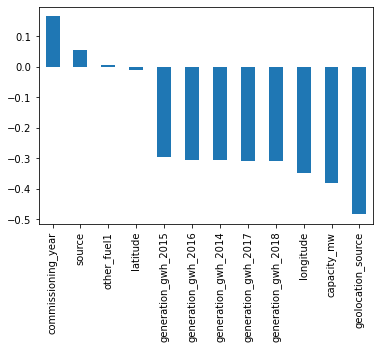

In [41]:
df_corr = df.corr()
df_corr['primary_fuel'].sort_values(ascending=False).drop('primary_fuel').plot.bar()

<AxesSubplot:>

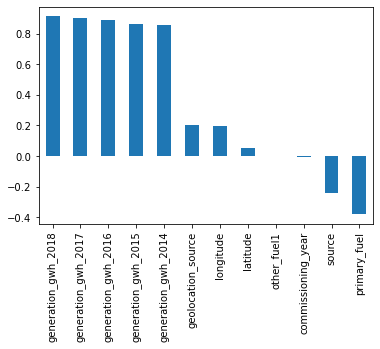

In [42]:
df.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot.bar()

dropping other fuel 1 as it is negatively corelated

In [43]:
df.drop('other_fuel1',axis=1,inplace=True)

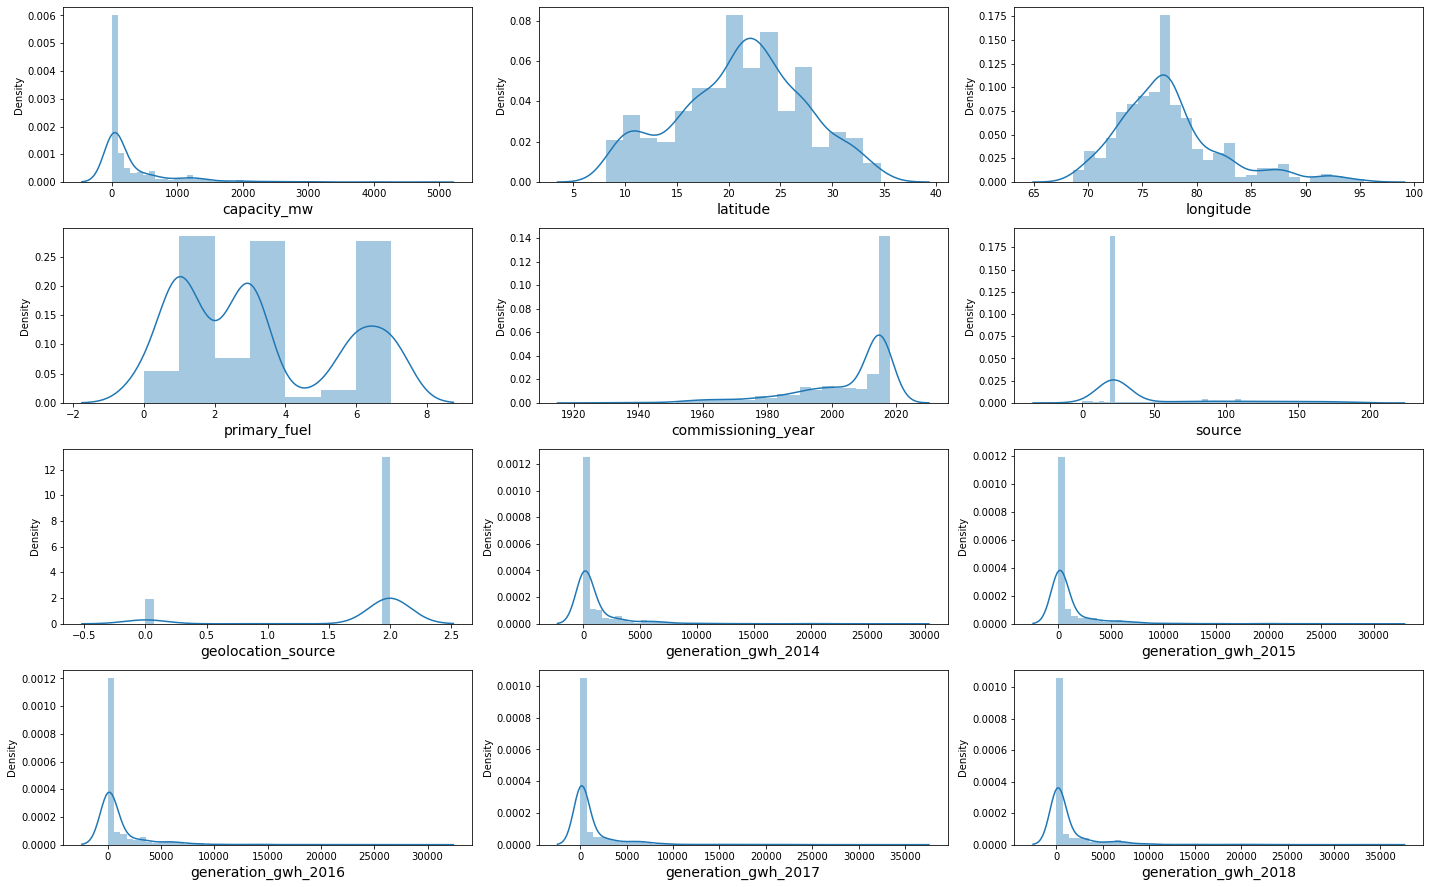

In [44]:
plt.figure(figsize=(20,15))
i=1
for y in df:
    if i<=15:
        ax=plt.subplot(5,3,i)
        sns.distplot(df[y])
        plt.xlabel(y,fontsize=14)
    i+=1
plt.tight_layout()

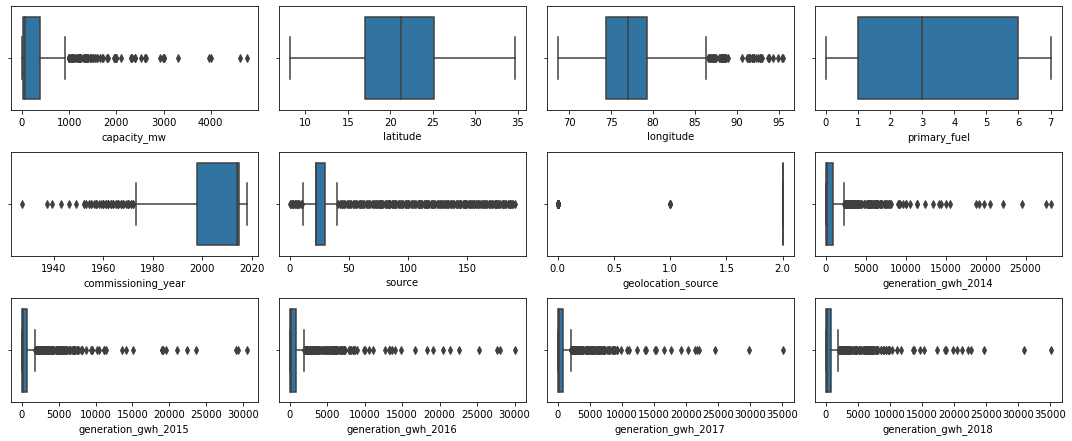

In [45]:
x=df.columns.values
plt.figure(figsize=(15,20))
for i in range(0,len(x)):
    plt.subplot(10,4,i+1)
    sns.boxplot(df[x[i]])
    plt.tight_layout()

In [46]:
X=df.drop(columns=['primary_fuel'],axis=1)
Y=df['primary_fuel']
print("Feature Dimension",X.shape)
print("Label Dimension",Y.shape)   #no of rows should be same in features and label

Feature Dimension (907, 11)
Label Dimension (907,)


In [47]:
from scipy.stats import zscore
z=np.abs(zscore(X))
z
threshold=3
np.where(z>3)

(array([ 15,  15,  15,  15,  15,  71,  80, 143, 143, 143, 143, 143, 143,
        147, 158, 179, 183, 191, 209, 209, 209, 209, 209, 209, 222, 244,
        299, 308, 308, 308, 308, 308, 308, 321, 323, 333, 340, 342, 345,
        360, 363, 364, 364, 364, 364, 364, 364, 371, 375, 414, 414, 414,
        416, 427, 444, 454, 478, 482, 484, 493, 493, 493, 493, 493, 493,
        494, 494, 494, 494, 494, 494, 499, 519, 532, 538, 541, 546, 573,
        577, 583, 601, 621, 638, 648, 648, 648, 648, 648, 648, 657, 657,
        657, 657, 657, 657, 661, 669, 689, 695, 695, 695, 695, 695, 695,
        706, 709, 721, 721, 721, 721, 721, 724, 724, 724, 724, 724, 726,
        726, 726, 726, 726, 726, 728, 767, 786, 786, 786, 786, 786, 786,
        788, 807, 808, 808, 808, 808, 808, 808, 818, 832, 847, 848, 870,
        871, 879, 880, 880, 880, 880, 880, 880, 895, 900], dtype=int64),
 array([ 0,  7,  8,  9, 10,  4,  4,  0,  6,  7,  8,  9, 10,  0,  6,  2,  2,
         4,  0,  6,  7,  8,  9, 10,  3,  2,  4, 

In [48]:
df1=df[(z<3).all(axis=1)]
df1.shape

(833, 12)

In [49]:
print("Old df: ", df.shape[0])
print("New df",df1.shape[0])

Old df:  907
New df 833


In [50]:
Y=Y[(z<3).all(axis=1)]
Y.shape

(833,)

In [51]:
print("Data Loss Percentage: ", ((df.shape[0]-df1.shape[0])/df.shape[0]*100))

Data Loss Percentage:  8.158765159867695


In [52]:
df1.skew()

capacity_mw            1.954723
latitude              -0.109463
longitude              0.913793
primary_fuel           0.411789
commissioning_year    -1.510272
source                 1.785863
geolocation_source    -2.102192
generation_gwh_2014    2.576784
generation_gwh_2015    2.553074
generation_gwh_2016    2.537781
generation_gwh_2017    2.469980
generation_gwh_2018    2.504529
dtype: float64

In [53]:
df1['capacity_mw']=np.cbrt(df1['capacity_mw'])
df1['source']=np.cbrt(df1['source'])
df1['geolocation_source']=np.cbrt(df1['geolocation_source'])
df1['generation_gwh_2014']=np.cbrt(df1['generation_gwh_2014'])
df1['generation_gwh_2015']=np.cbrt(df1['generation_gwh_2015'])
df1['generation_gwh_2016']=np.cbrt(df1['generation_gwh_2016'])
df1['generation_gwh_2017']=np.cbrt(df1['generation_gwh_2017'])
df1['generation_gwh_2018']=np.cbrt(df1['generation_gwh_2018'])

In [54]:
df1.skew()

capacity_mw            0.815324
latitude              -0.109463
longitude              0.913793
primary_fuel           0.411789
commissioning_year    -1.510272
source                 1.270764
geolocation_source    -2.125327
generation_gwh_2014    1.032707
generation_gwh_2015    1.110277
generation_gwh_2016    1.084893
generation_gwh_2017    1.143897
generation_gwh_2018    1.181430
dtype: float64

In [55]:
x=df.drop('primary_fuel',axis=1)
y=df['primary_fuel']
x.head()

,capacity_mw,latitude,longitude,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,2011.0,109.0,1.0,16.779017,13.293200,8.974900,22.244883,47.968950
1,98.0,24.7663,74.6090,2015.0,174.0,2.0,324.532517,168.964267,253.214233,210.319783,299.083733
2,39.2,21.9038,69.3732,2015.0,21.0,2.0,85.185267,112.481433,114.819683,185.902483,198.180783
3,135.0,23.8712,91.3602,2004.0,22.0,2.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,2015.0,22.0,2.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X

,capacity_mw,latitude,longitude,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-0.548908,1.149805,-0.878280,0.407327,1.460215,-1.083349,-0.407783,-0.388685,-0.394962,-0.399239,-0.395075
1,-0.386977,0.587311,-0.593788,0.661679,2.917019,0.394241,-0.303199,-0.338753,-0.317101,-0.340211,-0.318779
2,-0.486679,0.116179,-1.682394,0.661679,-0.512075,0.394241,-0.384536,-0.356870,-0.361220,-0.347875,-0.349436
3,-0.324240,0.439989,2.889052,-0.037788,-0.489662,0.394241,-0.203542,-0.122313,-0.115372,-0.197893,-0.219380
4,2.498942,0.125479,1.027976,0.661679,-0.489662,0.394241,0.618085,1.504758,1.592397,1.284064,1.801917
...,...,...,...,...,...,...,...,...,...,...,...
902,2.159821,-0.806975,-0.022477,0.725267,-0.489662,0.394241,0.841002,-0.392630,-0.323355,-0.134612,-0.201071
903,-0.548060,-1.366853,0.145644,0.661679,0.743019,-2.560940,-0.407783,-0.388685,-0.394962,-0.399239,-0.395075
904,-0.509909,-0.974707,-0.391673,0.661679,-0.512075,0.394241,-0.407783,-0.388685,-0.394962,-0.399239,-0.395075
905,-0.417498,0.518793,-0.772866,0.661679,0.339596,0.394241,-0.340967,-0.332867,-0.328925,-0.329901,-0.331681


In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X.values,i)
              for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

,VIF values,Features
0,6.548360,capacity_mw
1,1.053441,latitude
2,1.133600,longitude
3,1.174311,commissioning_year
4,1.488444,source
5,1.465906,geolocation_source
6,13.219376,generation_gwh_2014
7,30.655864,generation_gwh_2015
8,40.801104,generation_gwh_2016
9,55.956842,generation_gwh_2017


In [58]:
X.drop("generation_gwh_2017",axis=1,inplace=True)

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X.values,i)
              for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

,VIF values,Features
0,6.525488,capacity_mw
1,1.051848,latitude
2,1.132331,longitude
3,1.174296,commissioning_year
4,1.488156,source
5,1.465825,geolocation_source
6,13.091036,generation_gwh_2014
7,29.939968,generation_gwh_2015
8,33.216416,generation_gwh_2016
9,19.369172,generation_gwh_2018


In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor
maxAccu=0
maxRs=0
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print("Max r2 score is ",maxAccu,"on Random_state",maxRs)

Max r2 score is  0.5563928710717557 on Random_state 902


In [61]:
 x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=maxRs,test_size=0.20)

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge

In [63]:
LR=LinearRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)
pred_train=LR.predict(x_train)
print("r2_score:",r2_score(y_test,pred_LR))
print("r2_score on training data:",r2_score(y_test,pred_LR)*100)
print( "Mean absolute error:",mean_absolute_error(y_test,pred_LR))
print( "mean_squared_error:",mean_squared_error(y_test,pred_LR))
print("Root mean_squared_error",np.sqrt(mean_squared_error(y_test,pred_LR)))

r2_score: 0.5563928710717557
r2_score on training data: 55.63928710717557
Mean absolute error: 1.1981791830193922
mean_squared_error: 2.338633464831984
Root mean_squared_error 1.5292591228539343


In [64]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR=RFR.predict(x_test)
pred_train=RFR.predict(x_train)
print("r2_score:",r2_score(y_test,pred_RFR))
print("r2_score on training data:",r2_score(y_test,pred_RFR)*100)
print( "Mean absolute error:",mean_absolute_error(y_test,pred_RFR))
print( "mean_squared_error:",mean_squared_error(y_test,pred_RFR))
print("Root mean_squared_error",np.sqrt(mean_squared_error(y_test,pred_RFR)))

r2_score: 0.9237848097351468
r2_score on training data: 92.37848097351467
Mean absolute error: 0.34186813186813186
mean_squared_error: 0.4017956043956044
Root mean_squared_error 0.6338734924222691


In [65]:
knn=KNN()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
pred_train=knn.predict(x_train)
print("r2_score:",r2_score(y_test,pred_knn))
print("r2_score on training data:",r2_score(y_test,pred_knn)*100)
print( "Mean absolute error:",mean_absolute_error(y_test,pred_knn))
print( "mean_squared_error:",mean_squared_error(y_test,pred_knn))
print("Root mean_squared_error",np.sqrt(mean_squared_error(y_test,pred_knn)))

r2_score: 0.39704715819613456
r2_score on training data: 39.704715819613455
Mean absolute error: 1.2142857142857142
mean_squared_error: 3.1786813186813188
Root mean_squared_error 1.7828856717920303


In [66]:
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR=GBR.predict(x_test)
pred_train=GBR.predict(x_train)
print("r2_score:",r2_score(y_test,pred_GBR))
print("r2_score on training data:",r2_score(y_test,pred_GBR)*100)
print( "Mean absolute error:",mean_absolute_error(y_test,pred_GBR))
print( "mean_squared_error:",mean_squared_error(y_test,pred_GBR))
print("Root mean_squared_error",np.sqrt(mean_squared_error(y_test,pred_GBR)))

r2_score: 0.9286160509800818
r2_score on training data: 92.86160509800818
Mean absolute error: 0.40391804794192504
mean_squared_error: 0.37632599014621443
Root mean_squared_error 0.6134541467348757


In [67]:
# Checking R2 score for BaggingRegressor
from sklearn.ensemble import BaggingRegressor
BR=BaggingRegressor()
BR.fit(x_train,y_train)

# prediction
predBR=BR.predict(x_test)
print('R2_Score:',r2_score(y_test,predBR))
print('MAE:',mean_absolute_error(y_test, predBR))
print('MSE:',mean_squared_error(y_test, predBR))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predBR)))

R2_Score: 0.9186536864710093
MAE: 0.3489010989010989
MSE: 0.42884615384615393
RMSE: 0.6548634619874237


In [68]:
lasso=Lasso()
lasso.fit(x_train,y_train)
pred_lasso=lasso.predict(x_test)
pred_train=lasso.predict(x_train)
print("r2_score:",r2_score(y_test,pred_lasso))
print("r2_score on training data:",r2_score(y_test,pred_lasso)*100)
print( "Mean absolute error:",mean_absolute_error(y_test,pred_lasso))
print( "mean_squared_error:",mean_squared_error(y_test,pred_lasso))
print("Root mean_squared_error",np.sqrt(mean_squared_error(y_test,pred_lasso)))

r2_score: 0.26501253873227104
r2_score on training data: 26.501253873227103
Mean absolute error: 1.6254379657100257
mean_squared_error: 3.8747489863505966
Root mean_squared_error 1.9684382099396964


In [69]:
rd=Ridge()
rd.fit(x_train,y_train)
pred_rd=rd.predict(x_test)
pred_train=rd.predict(x_train)
print("r2_score:",r2_score(y_test,pred_rd))
print("r2_score on training data:",r2_score(y_test,pred_rd)*100)
print( "Mean absolute error:",mean_absolute_error(y_test,pred_rd))
print( "mean_squared_error:",mean_squared_error(y_test,pred_rd))
print("Root mean_squared_error",np.sqrt(mean_squared_error(y_test,pred_rd)))

r2_score: 0.5559413069046895
r2_score on training data: 55.594130690468944
Mean absolute error: 1.1992429507476345
mean_squared_error: 2.3410140466661216
Root mean_squared_error 1.5300372696983957


In [70]:
from sklearn.ensemble import ExtraTreesRegressor
etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_etr=etr.predict(x_test)
pred_train=etr.predict(x_train)
print("r2_score:",r2_score(y_test,pred_etr))
print("r2_score on training data:",r2_score(y_test,pred_etr)*100)
print( "Mean absolute error:",mean_absolute_error(y_test,pred_etr))
print( "mean_squared_error:",mean_squared_error(y_test,pred_etr))
print("Root mean_squared_error",np.sqrt(mean_squared_error(y_test,pred_etr)))

r2_score: 0.9337774304939155
r2_score on training data: 93.37774304939155
Mean absolute error: 0.32873626373626375
mean_squared_error: 0.34911593406593405
Root mean_squared_error 0.5908603338065046


In [71]:
from sklearn.model_selection import cross_val_score

In [72]:
score=cross_val_score(LR,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross_val_score:",(r2_score(y_test,pred_LR)-score.mean())*100)

[0.42736329 0.43953547 0.4124995  0.50969526 0.40152955]
0.4381246116889444
Difference between R2 score and cross_val_score: 11.826825938281132


In [73]:
score1=cross_val_score(RFR,x,y)
print(score1)
print(score1.mean())
print("Difference between R2 score and cross_val_score:",(r2_score(y_test,pred_RFR)-score1.mean())*100)

[0.88838882 0.91106086 0.87629222 0.93150908 0.92276643]
0.9060034799589717
Difference between R2 score and cross_val_score: 1.778132977617508


In [74]:
score2=cross_val_score(knn,x,y)
print(score2)
print(score2.mean())
print("Difference between R2 score and cross_val_score:",(r2_score(y_test,pred_knn)-score2.mean())*100)

[0.21807424 0.36603    0.3510844  0.59998984 0.51855094]
0.4107458851562894
Difference between R2 score and cross_val_score: -1.369872696015484


In [75]:
score3=cross_val_score(GBR,x,y)
print(score3)
print(score3.mean())
print("Difference between R2 score and cross_val_score:",(r2_score(y_test,pred_GBR)-score3.mean())*100)

[0.88558252 0.9250214  0.84293763 0.91925309 0.92311677]
0.8991822826784333
Difference between R2 score and cross_val_score: 2.9433768301648566


In [76]:
score4=cross_val_score(lasso,x,y)
print(score4)
print(score4.mean())
print("Difference between R2 score and cross_val_score:",(r2_score(y_test,pred_lasso)-score4.mean())*100)

[0.20123761 0.22041674 0.19951575 0.26984457 0.26141337]
0.23048560868114673
Difference between R2 score and cross_val_score: 3.452693005112431


In [77]:
score5=cross_val_score(rd,x,y)
print(score5)
print(score5.mean())
print("Difference between R2 score and cross_val_score:",(r2_score(y_test,pred_rd)-score5.mean())*100)

[0.42756697 0.43925263 0.41263644 0.50937103 0.4017549 ]
0.4381163948160813
Difference between R2 score and cross_val_score: 11.782491208860819


In [78]:
score6=cross_val_score(etr,x,y)
print(score6)
print(score6.mean())
print("Difference between R2 score and cross_val_score:",(r2_score(y_test,pred_etr)-score6.mean())*100)

[0.85110652 0.91261561 0.88436632 0.93997056 0.93404181]
0.9044201640159549
Difference between R2 score and cross_val_score: 2.9357266477960553


In [79]:
score8=cross_val_score(BR,x,y)
print(score8)
print(score8.mean())
print("Difference between R2 score and cross_val_score:",(r2_score(y_test,predBR)-score8.mean())*100)

[0.88020462 0.89018318 0.85673452 0.9300397  0.92506444]
0.8964452903204965
Difference between R2 score and cross_val_score: 2.2208396150512844


GradientBoosting Regressor as our best fitting model

In [80]:
from sklearn.model_selection import GridSearchCV

In [81]:
parameters={'loss' : ['squared_error', 'absolute_error', 'huber', 'quantile'],
           'max_features' : ['auto', 'sqrt', 'log2'],
           'learning_rate':[0.1,.2,.4,.5],
           'criterion' : ['friedman_mse', 'squared_error', 'mse'], 
          
          }


In [82]:
GCV=GridSearchCV(GradientBoostingRegressor(),parameters,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error', 'mse'],
                         'learning_rate': [0.1, 0.2, 0.4, 0.5],
                         'loss': ['squared_error', 'absolute_error', 'huber',
                                  'quantile'],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [83]:
GCV.best_params_


{'criterion': 'mse',
 'learning_rate': 0.2,
 'loss': 'squared_error',
 'max_features': 'auto'}

In [86]:
capacity_model = GradientBoostingRegressor(criterion='mse', learning_rate= 0.2, loss= 'squared_error',max_features= 'auto')
capacity_model.fit(x_train, y_train)
pred = capacity_model.predict(x_test)
print("RMSE value:",np.sqrt(mean_squared_error(y_test, pred_RFR)))
print('R2_Score:',r2_score(y_test,pred)*100)

RMSE value: 0.6338734924222691
R2_Score: 92.13979684011451


In [87]:
# Saving the model using .pkl
import joblib
joblib.dump(capacity_model,"Global_Power_Plant_capacity_mw.pkl")

['Global_Power_Plant_capacity_mw.pkl']

In [88]:
# Loading the saved model
model=joblib.load("Global_Power_Plant_capacity_mw.pkl")

#Prediction
prediction = model.predict(x_test)
a = np.array(y_test)
df_final = pd.DataFrame({"Original":a,"Predicted":prediction},index=range(len(a)))
df_final

,Original,Predicted
0,2,3.931896
1,1,1.212250
2,0,0.241670
3,6,5.642758
4,3,2.818039
...,...,...
177,6,5.904672
178,3,3.534540
179,1,2.801813
180,7,6.877886


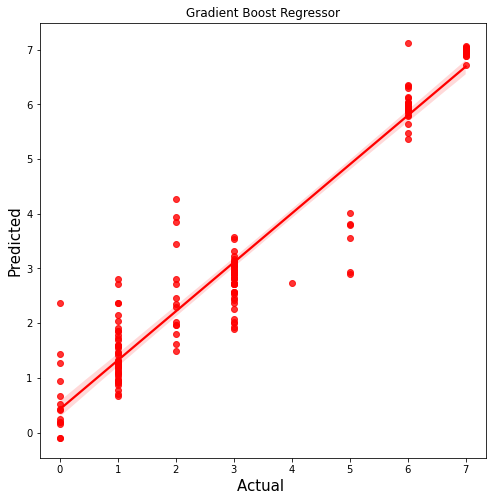

In [89]:
plt.figure(figsize=(8,8))
sns.regplot(y_test,prediction,color='r')
plt.xlabel('Actual ',fontsize=15)
plt.ylabel('Predicted',fontsize=15)
plt.title("Gradient Boost Regressor")
plt.show()

MODEL 2 capacity_mw is target variable . Let us Do the Classification

In [90]:
df.head()


,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,2011.0,109.0,1.0,16.779017,13.293200,8.974900,22.244883,47.968950
1,98.0,24.7663,74.6090,1,2015.0,174.0,2.0,324.532517,168.964267,253.214233,210.319783,299.083733
2,39.2,21.9038,69.3732,7,2015.0,21.0,2.0,85.185267,112.481433,114.819683,185.902483,198.180783
3,135.0,23.8712,91.3602,2,2004.0,22.0,2.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1,2015.0,22.0,2.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


In [91]:
#let us rename 'primary_fuel' to Fuel_Type
df.rename(columns={'primary_fuel':'Fuel_Type'},inplace=True)

In [92]:
df.corr()

,capacity_mw,latitude,longitude,Fuel_Type,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
capacity_mw,1.000000,0.050984,0.195882,-0.380395,-0.004072,-0.242122,0.204865,0.856402,0.865546,0.887566,0.900910,0.912287
latitude,0.050984,1.000000,0.036362,-0.010204,0.034519,0.055927,-0.184275,0.056823,0.053340,0.049539,0.057951,0.054626
longitude,0.195882,0.036362,1.000000,-0.347948,-0.159025,-0.239333,0.252343,0.159262,0.160773,0.180694,0.192787,0.189782
Fuel_Type,-0.380395,-0.010204,-0.347948,1.000000,0.164947,0.053613,-0.483217,-0.305067,-0.296747,-0.304207,-0.308670,-0.309320
commissioning_year,-0.004072,0.034519,-0.159025,0.164947,1.000000,0.322222,-0.259929,-0.058544,-0.036973,-0.019931,-0.014944,-0.011198
source,-0.242122,0.055927,-0.239333,0.053613,0.322222,1.000000,-0.505720,-0.185043,-0.177553,-0.180559,-0.183586,-0.182214
geolocation_source,0.204865,-0.184275,0.252343,-0.483217,-0.259929,-0.505720,1.000000,0.155821,0.149314,0.151722,0.153137,0.152339
generation_gwh_2014,0.856402,0.056823,0.159262,-0.305067,-0.058544,-0.185043,0.155821,1.000000,0.959103,0.937960,0.916587,0.909878
generation_gwh_2015,0.865546,0.053340,0.160773,-0.296747,-0.036973,-0.177553,0.149314,0.959103,1.000000,0.974132,0.946379,0.942575
generation_gwh_2016,0.887566,0.049539,0.180694,-0.304207,-0.019931,-0.180559,0.151722,0.937960,0.974132,1.000000,0.974370,0.966330


<AxesSubplot:>

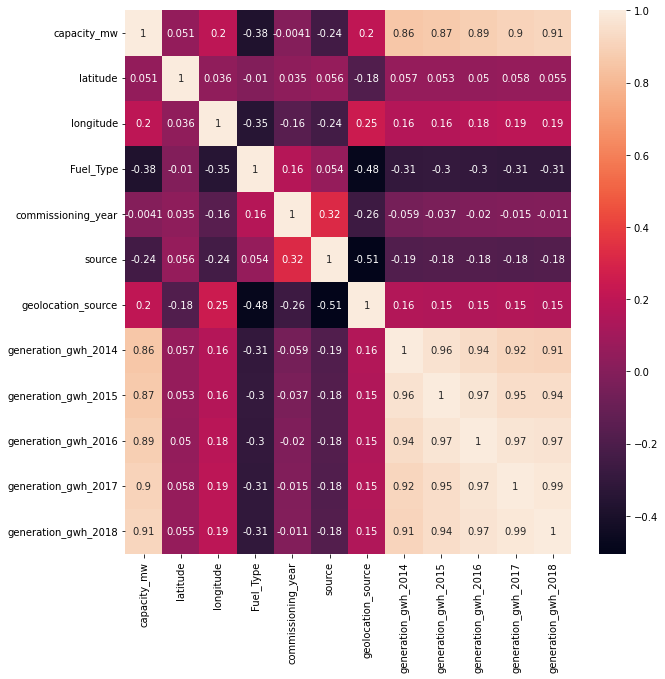

In [93]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot = True)

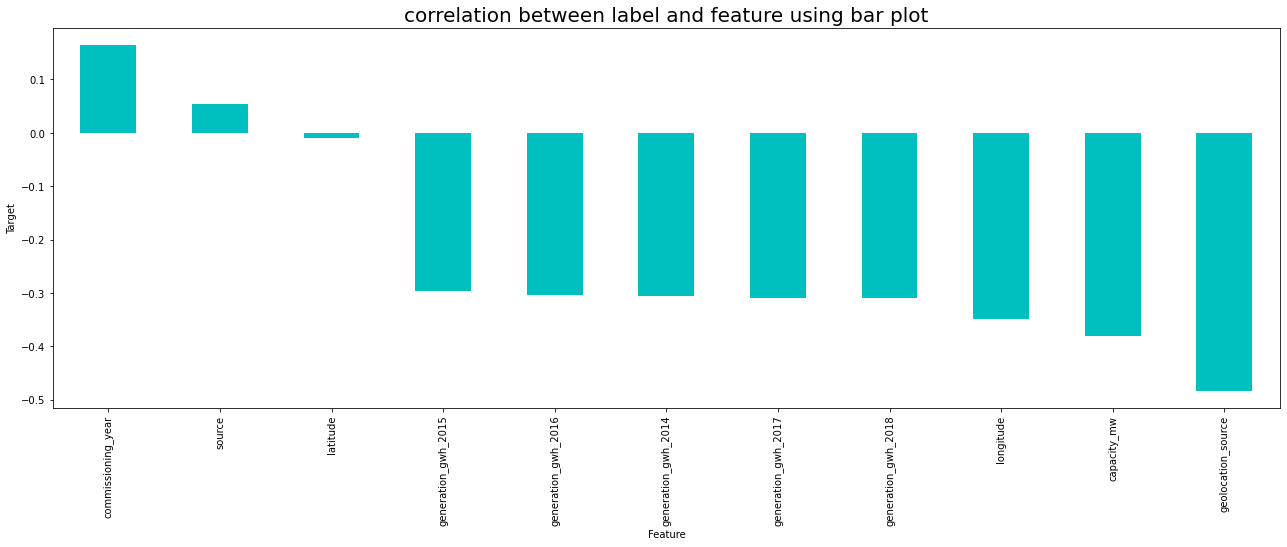

In [94]:
plt.figure(figsize=(22,7))
df.corr()['Fuel_Type'].sort_values(ascending=False).drop(['Fuel_Type']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=10)
plt.ylabel('Target',fontsize=10)
plt.title('correlation between label and feature using bar plot',fontsize=20)
plt.show()

In [95]:
cl_x=df.drop("Fuel_Type",axis=1)#features
cl_y=df['Fuel_Type']#Label

In [96]:
cl_x.shape


(907, 11)

In [97]:
cl_y.shape


(907,)

In [98]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cl_x= pd.DataFrame(scaler.fit_transform(cl_x), columns=cl_x.columns)
cl_x

,capacity_mw,latitude,longitude,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-0.548908,1.149805,-0.878280,0.407327,1.460215,-1.083349,-0.407783,-0.388685,-0.394962,-0.399239,-0.395075
1,-0.386977,0.587311,-0.593788,0.661679,2.917019,0.394241,-0.303199,-0.338753,-0.317101,-0.340211,-0.318779
2,-0.486679,0.116179,-1.682394,0.661679,-0.512075,0.394241,-0.384536,-0.356870,-0.361220,-0.347875,-0.349436
3,-0.324240,0.439989,2.889052,-0.037788,-0.489662,0.394241,-0.203542,-0.122313,-0.115372,-0.197893,-0.219380
4,2.498942,0.125479,1.027976,0.661679,-0.489662,0.394241,0.618085,1.504758,1.592397,1.284064,1.801917
...,...,...,...,...,...,...,...,...,...,...,...
902,2.159821,-0.806975,-0.022477,0.725267,-0.489662,0.394241,0.841002,-0.392630,-0.323355,-0.134612,-0.201071
903,-0.548060,-1.366853,0.145644,0.661679,0.743019,-2.560940,-0.407783,-0.388685,-0.394962,-0.399239,-0.395075
904,-0.509909,-0.974707,-0.391673,0.661679,-0.512075,0.394241,-0.407783,-0.388685,-0.394962,-0.399239,-0.395075
905,-0.417498,0.518793,-0.772866,0.661679,0.339596,0.394241,-0.340967,-0.332867,-0.328925,-0.329901,-0.331681


In [99]:
#Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(cl_x.values,i)
              for i in range(len(cl_x.columns))]
vif["Features"] = cl_x.columns

# Let's check the values
vif

,VIF values,Features
0,6.548360,capacity_mw
1,1.053441,latitude
2,1.133600,longitude
3,1.174311,commissioning_year
4,1.488444,source
5,1.465906,geolocation_source
6,13.219376,generation_gwh_2014
7,30.655864,generation_gwh_2015
8,40.801104,generation_gwh_2016
9,55.956842,generation_gwh_2017


In [100]:
# Oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
cl_x, cl_y = SM.fit_resample(cl_x,cl_y)
cl_y.value_counts()

6    258
1    258
7    258
2    258
3    258
0    258
5    258
4    258
Name: Fuel_Type, dtype: int64

In [101]:
#Finding best random state
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    clx_train,clx_test,cly_train,cly_test = train_test_split(cl_x,cl_y,test_size=.25, random_state =i)
    DTC = DecisionTreeClassifier()
    DTC.fit(clx_train, cly_train)
    pred = DTC.predict(clx_test)
    acc=accuracy_score(cly_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.9186046511627907  on Random_state  97


In [102]:
clx_train,clx_test,cly_train,cly_test = train_test_split(cl_x,cl_y,test_size=.30, random_state =maxRS)


In [103]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [104]:
# Checking Accuracy for Decision Tree Classifier
DTC = DecisionTreeClassifier()
DTC.fit(clx_train,cly_train)

#Prediction
pred = DTC.predict(clx_test)
#Accuracy
print(accuracy_score(cly_test, pred))
print(confusion_matrix(cly_test, pred))
print(classification_report(cly_test,pred))
#Cross Validation
# cv score for Decision Tree Classifier
print(cross_val_score(DTC,cl_x,cl_y,cv=5).mean())

0.9112903225806451
[[67  1  0  0  0  0  0  0]
 [ 5 57  4  6  3  2  0  0]
 [ 0  3 75  7  0  1  0  0]
 [ 0  7  7 55  2  0  0  0]
 [ 0  0  0  1 62  0  0  0]
 [ 1  0  3  0  0 84  0  1]
 [ 0  1  0  0  0  0 83  0]
 [ 0  0  0  0  0  0  0 82]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.95        68
           1       0.83      0.74      0.78        77
           2       0.84      0.87      0.86        86
           3       0.80      0.77      0.79        71
           4       0.93      0.98      0.95        63
           5       0.97      0.94      0.95        89
           6       1.00      0.99      0.99        84
           7       0.99      1.00      0.99        82

    accuracy                           0.91       620
   macro avg       0.91      0.91      0.91       620
weighted avg       0.91      0.91      0.91       620

0.8895401866522485


In [105]:
RFC = RandomForestClassifier()
RFC.fit(clx_train,cly_train)

#Prediction
pred = RFC.predict(clx_test)
#Accuracy
print(accuracy_score(cly_test, pred)*100)
print(confusion_matrix(cly_test, pred))
print(classification_report(cly_test,pred))
#Cross Validation
# cv score for Decision Tree Classifier
print("Corross Validation Score",cross_val_score(RFC,cl_x,cl_y,cv=5).mean()*100)

91.12903225806451
[[65  3  0  0  0  0  0  0]
 [ 8 58  3  3  5  0  0  0]
 [ 0  4 73  2  0  7  0  0]
 [ 0  6  7 56  1  1  0  0]
 [ 0  0  0  1 62  0  0  0]
 [ 1  0  0  0  0 88  0  0]
 [ 0  1  0  0  0  2 81  0]
 [ 0  0  0  0  0  0  0 82]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92        68
           1       0.81      0.75      0.78        77
           2       0.88      0.85      0.86        86
           3       0.90      0.79      0.84        71
           4       0.91      0.98      0.95        63
           5       0.90      0.99      0.94        89
           6       1.00      0.96      0.98        84
           7       1.00      1.00      1.00        82

    accuracy                           0.91       620
   macro avg       0.91      0.91      0.91       620
weighted avg       0.91      0.91      0.91       620

Corross Validation Score 91.86111568207998


In [106]:
SVM = SVC()
SVM.fit(clx_train,cly_train)

#Prediction
pred = SVM.predict(clx_test)
#Accuracy
print(accuracy_score(cly_test, pred)*100)
print(confusion_matrix(cly_test, pred))
print(classification_report(cly_test,pred))
#Cross Validation
# cv score for Decision Tree Classifier
print("Corross Validation Score",cross_val_score(SVM,cl_x,cl_y,cv=5).mean()*100)

80.48387096774194
[[62  1  0  0  0  0  0  5]
 [ 7 48  2  4  7  4  0  5]
 [ 3  2 57 12  0 11  0  1]
 [ 0  6  9 39  0 16  0  1]
 [ 0  0  0  2 61  0  0  0]
 [ 3  0  1  6  0 72  0  7]
 [ 5  1  0  0  0  0 78  0]
 [ 0  0  0  0  0  0  0 82]]
              precision    recall  f1-score   support

           0       0.78      0.91      0.84        68
           1       0.83      0.62      0.71        77
           2       0.83      0.66      0.74        86
           3       0.62      0.55      0.58        71
           4       0.90      0.97      0.93        63
           5       0.70      0.81      0.75        89
           6       1.00      0.93      0.96        84
           7       0.81      1.00      0.90        82

    accuracy                           0.80       620
   macro avg       0.81      0.81      0.80       620
weighted avg       0.81      0.80      0.80       620

Corross Validation Score 81.4928653706011


In [107]:
knn = KNN()
knn.fit(clx_train,cly_train)

#Prediction
pred = knn.predict(clx_test)
#Accuracy
print(accuracy_score(cly_test, pred)*100)
print(confusion_matrix(cly_test, pred))
print(classification_report(cly_test,pred))
#Cross Validation
# cv score for Decision Tree Classifier
print("Corross Validation Score",cross_val_score(knn,cl_x,cl_y,cv=5).mean()*100)

87.90322580645162
[[65  0  0  0  0  1  0  2]
 [ 7 44  6  2 10  4  1  3]
 [ 1  2 72  1  1  8  1  0]
 [ 0  4  6 53  4  3  0  1]
 [ 0  0  0  0 63  0  0  0]
 [ 0  0  0  6  0 82  0  1]
 [ 0  0  0  0  0  0 84  0]
 [ 0  0  0  0  0  0  0 82]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.88      0.57      0.69        77
           2       0.86      0.84      0.85        86
           3       0.85      0.75      0.80        71
           4       0.81      1.00      0.89        63
           5       0.84      0.92      0.88        89
           6       0.98      1.00      0.99        84
           7       0.92      1.00      0.96        82

    accuracy                           0.88       620
   macro avg       0.88      0.88      0.87       620
weighted avg       0.88      0.88      0.87       620

Corross Validation Score 89.14772326570912


In [108]:
BC= BaggingClassifier()
BC.fit(clx_train,cly_train)

#Prediction
pred = BC.predict(clx_test)
#Accuracy
print(accuracy_score(cly_test, pred)*100)
print(confusion_matrix(cly_test, pred))
print(classification_report(cly_test,pred))
#Cross Validation
# cv score for Decision Tree Classifier
print("Corross Validation Score",cross_val_score(BC,cl_x,cl_y,cv=5).mean()*100)

92.74193548387096
[[68  0  0  0  0  0  0  0]
 [ 7 59  3  2  2  4  0  0]
 [ 0  2 81  0  0  3  0  0]
 [ 0  6  8 55  2  0  0  0]
 [ 0  1  0  0 62  0  0  0]
 [ 0  1  2  0  0 85  0  1]
 [ 0  1  0  0  0  0 83  0]
 [ 0  0  0  0  0  0  0 82]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        68
           1       0.84      0.77      0.80        77
           2       0.86      0.94      0.90        86
           3       0.96      0.77      0.86        71
           4       0.94      0.98      0.96        63
           5       0.92      0.96      0.94        89
           6       1.00      0.99      0.99        84
           7       0.99      1.00      0.99        82

    accuracy                           0.93       620
   macro avg       0.93      0.93      0.93       620
weighted avg       0.93      0.93      0.93       620

Corross Validation Score 91.90954183220103


In [109]:
GBC = GradientBoostingClassifier()
GBC.fit(clx_train,cly_train)

#Prediction
pred = GBC.predict(clx_test)
#Accuracy
print(accuracy_score(cly_test, pred)*100)
print(confusion_matrix(cly_test, pred))
print(classification_report(cly_test,pred))
#Cross Validation
# cv score for Decision Tree Classifier
print("Corross Validation Score",cross_val_score(GBC,cl_x,cl_y,cv=5).mean()*100)

90.80645161290323
[[67  1  0  0  0  0  0  0]
 [ 7 56  3  5  6  0  0  0]
 [ 0  4 74  1  0  7  0  0]
 [ 0  6  7 56  2  0  0  0]
 [ 0  0  0  2 61  0  0  0]
 [ 0  1  2  1  0 84  0  1]
 [ 0  1  0  0  0  0 83  0]
 [ 0  0  0  0  0  0  0 82]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.94        68
           1       0.81      0.73      0.77        77
           2       0.86      0.86      0.86        86
           3       0.86      0.79      0.82        71
           4       0.88      0.97      0.92        63
           5       0.92      0.94      0.93        89
           6       1.00      0.99      0.99        84
           7       0.99      1.00      0.99        82

    accuracy                           0.91       620
   macro avg       0.90      0.91      0.91       620
weighted avg       0.91      0.91      0.91       620

Corross Validation Score 92.78109499518091


In [110]:
parameters={'loss' : ['log_loss', 'deviance', 'exponential'],
           'n_estimators':[1,20,50,100],
           'learning_rate':[0.1,.2,.4,.5],
           'criterion' : ['friedman_mse', 'squared_error', 'mse'], 
           }
GVC=GridSearchCV(GradientBoostingClassifier(),parameters,cv=10)

In [111]:
GVC.fit(clx_train,cly_train)


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'squared_error', 'mse'],
                         'learning_rate': [0.1, 0.2, 0.4, 0.5],
                         'loss': ['log_loss', 'deviance', 'exponential'],
                         'n_estimators': [1, 20, 50, 100]})

In [112]:
GVC.best_params_


{'criterion': 'mse',
 'learning_rate': 0.5,
 'loss': 'deviance',
 'n_estimators': 100}

In [117]:
#initialising GradientBoost with best parameter
Fuel_Model=GradientBoostingClassifier(criterion= 'mse',learning_rate= 0.5,loss= 'deviance',n_estimators=100)

In [118]:
Fuel_Model.fit(clx_train, cly_train)
pred = Fuel_Model.predict(clx_test)
acc=accuracy_score(cly_test,pred)
print("Accuracy Score",acc*100)

Accuracy Score 91.61290322580645


In [119]:
# Saving the model using .pkl

import joblib
joblib.dump(Fuel_Model,"Global_Power_Plant_Fuel_Type.pkl")

['Global_Power_Plant_Fuel_Type.pkl']

In [120]:
# Let's load the saved model and get the prediction

# Loading the saved model
model=joblib.load("Global_Power_Plant_Fuel_Type.pkl")

#Prediction
prediction = model.predict(clx_test)
prediction

array([2, 4, 4, 6, 6, 3, 3, 6, 6, 6, 7, 1, 4, 7, 3, 6, 5, 6, 4, 7, 7, 5,
       0, 6, 0, 7, 1, 6, 6, 0, 2, 4, 6, 6, 5, 5, 2, 2, 4, 4, 2, 6, 1, 0,
       6, 2, 5, 6, 5, 7, 4, 0, 6, 6, 4, 0, 6, 6, 3, 0, 5, 5, 0, 7, 5, 3,
       2, 1, 5, 3, 4, 6, 5, 6, 2, 2, 3, 2, 6, 0, 5, 7, 7, 2, 3, 5, 1, 1,
       1, 2, 0, 7, 2, 7, 4, 2, 2, 2, 7, 6, 1, 6, 6, 3, 5, 7, 7, 6, 4, 7,
       6, 7, 0, 5, 5, 3, 0, 7, 6, 4, 3, 6, 6, 0, 6, 0, 2, 7, 2, 5, 5, 5,
       1, 1, 5, 0, 4, 6, 6, 4, 0, 7, 4, 4, 5, 3, 7, 3, 1, 2, 0, 7, 2, 5,
       0, 5, 3, 3, 3, 2, 3, 5, 6, 1, 4, 1, 1, 4, 5, 0, 3, 2, 4, 7, 1, 1,
       4, 3, 4, 2, 1, 2, 5, 6, 4, 5, 5, 2, 0, 7, 7, 0, 0, 5, 1, 3, 3, 0,
       3, 5, 5, 0, 5, 2, 0, 3, 7, 4, 0, 6, 7, 5, 5, 5, 5, 0, 0, 7, 0, 3,
       3, 5, 7, 5, 1, 1, 7, 2, 6, 2, 4, 5, 5, 5, 2, 0, 1, 2, 1, 6, 0, 2,
       1, 3, 2, 5, 0, 4, 3, 3, 6, 1, 0, 7, 5, 6, 2, 7, 1, 5, 5, 7, 1, 2,
       6, 2, 5, 0, 0, 5, 5, 0, 4, 7, 6, 6, 7, 5, 4, 1, 5, 1, 5, 4, 3, 7,
       1, 6, 5, 2, 1, 3, 2, 7, 7, 7, 1, 2, 0, 7, 0,

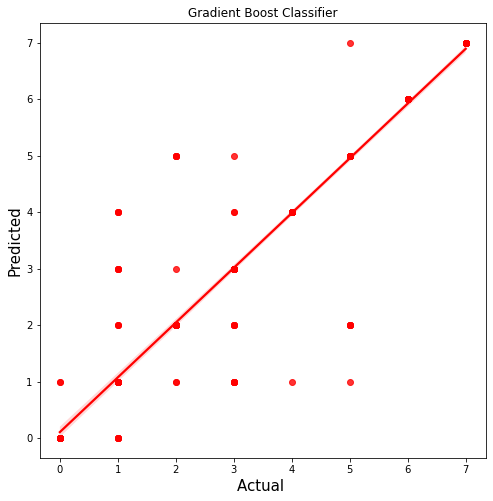

In [121]:
plt.figure(figsize=(8,8))
sns.regplot(cly_test,prediction,color='r')
plt.xlabel('Actual ',fontsize=15)
plt.ylabel('Predicted',fontsize=15)
plt.title("Gradient Boost Classifier")
plt.show()

The accuracy score is 91.61% for our model 